# WeatherPy_BG
----

### Analysis
* Temperatures Peak near the equator.  However the maximum temperature is higher in the northern hempisphere, due to the tilt of the earth (summer).  However, in the northern hemisphere there were outliers which maintained a low temperature despite a moderate latitude (~40 degrees north).  This may be due to factors such as elevation.

* There are strong bands of cloudiness at 0, 40, 20 60, 80 and 100% cloudiness. This indicates a measurement error.  Because no metric exists for total cloud cover, the recording of cloud cover data forces the observed state into a category, effectively "binning" the cloud cover at the time of measurement.

* There is a spike in wind speed at -30 to -40 south latitude.  It is itneresting to consider whether latitutde has an effect. See [Trade Winds](https://en.wikipedia.org/wiki/Trade_winds) which are well documented winds occurring consistently at certain latitudes.  The increase in wind speed may be due to winter in the southern hemisphere.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import csv

# Import API key
from api_keys import api_key

#set up target URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
#print(cities) #debug

In [4]:
#type(lat_lngs) #debug note: this returns a zip object which acts like a tuple.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#traverse the city list
#Include a print 
#log of each city as it'sbeing processed (with the city number and city name).

# Build query URL 
#query_url = f"{url}appid={api_key}&q={city}"#"&units={units}"
query_url = url + "appid=" + api_key + "&q=" 


# set up lists to hold reponse info
lat = []
long = []
temp = []
hum = []
cloud = []
wind = []
final_cities = []
excluded_cities =[] #probably not necessary but it doesn't hurt to keep a list of what gets tossed

#Add a progress counter
counter = 0

# Loop through the list of cities and perform a request for data on each
#NOTE: NEEDS EXCEPTION HANDLING not all cities returned by citipy may be tracked by openweather

for city in cities:
    
    #Get data    
    try:
        response = requests.get(query_url + city + "&units=" + units).json()
        lat.append(response["coord"]['lat']) #append the list of latitudes
        long.append(response['coord']['lon']) #append the list of longitudes
        temp.append(response['main']['temp_max']) #append the list of max temperatures
        hum.append(response['main']['humidity']) #append the list of hunidity values
        cloud.append(response["clouds"]["all"]) #append the list of cloud cover values
        wind.append(response["wind"]["speed"]) #append the list of wind speed
        final_cities.append(city) #build a list of the cities which returned a value and did not throw exception.
        
        #print status output
        print("Processing " + str(counter) +": Current City: " + city + "\n\t URL: " + query_url + city + "&units=" + units )
       
        counter = counter +1 #this shows progress
        
    # Catch exception if trying to access key that doesn't exist
    except KeyError: 
       #track cities which throw an exception
        excluded_cities.append(city)
        
        # print a message to notify user of city exception
        print ("Processing " + str(counter) +": Current City:" + city +"\n\t weather data not found -excluded from list") 
    
        counter = counter+1
        
    continue  #NOTE: to continue running the for loop the try/except block must be inside the for loop

print("City API calls complete") #let the user know that the call is done
    
    

Processing 0: Current City: rikitea
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=rikitea&units=imperial
Processing 1: Current City: tongren
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=tongren&units=imperial
Processing 2: Current City: verkhnevilyuysk
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=verkhnevilyuysk&units=imperial
Processing 3: Current City: jamestown
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=jamestown&units=imperial
Processing 4: Current City: qaanaaq
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=qaanaaq&units=imperial
Processing 5: Current City: barrow
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=barrow&units=imperial
Processing 6: Current City: sao filipe
	 URL: http://api.o

Processing 56: Current City: thompson
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=thompson&units=imperial
Processing 57: Current City: puerto ayora
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=puerto ayora&units=imperial
Processing 58: Current City: longyearbyen
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=longyearbyen&units=imperial
Processing 59: Current City:lyubeshiv
	 weather data not found -excluded from list
Processing 60: Current City: pujili
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=pujili&units=imperial
Processing 61: Current City: provideniya
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=provideniya&units=imperial
Processing 62: Current City: sitka
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a12

Processing 113: Current City: chokurdakh
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=chokurdakh&units=imperial
Processing 114: Current City: saint-philippe
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=saint-philippe&units=imperial
Processing 115: Current City:saleaula
	 weather data not found -excluded from list
Processing 116: Current City: camacha
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=camacha&units=imperial
Processing 117: Current City:nizhneyansk
	 weather data not found -excluded from list
Processing 118: Current City: kodiak
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=kodiak&units=imperial
Processing 119: Current City: luderitz
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=luderitz&units=imperial
Processing 120: Current City: e

Processing 168: Current City: dubbo
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=dubbo&units=imperial
Processing 169: Current City: chauk
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=chauk&units=imperial
Processing 170: Current City: tigil
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=tigil&units=imperial
Processing 171: Current City: ler
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=ler&units=imperial
Processing 172: Current City: marawi
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=marawi&units=imperial
Processing 173: Current City: keskin
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=keskin&units=imperial
Processing 174: Current City: salalah
	 URL: http://api.openweathermap.org/data/2.5/weat

Processing 222: Current City: rio grande
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=rio grande&units=imperial
Processing 223: Current City: plock
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=plock&units=imperial
Processing 224: Current City: fort nelson
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=fort nelson&units=imperial
Processing 225: Current City: cabinda
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=cabinda&units=imperial
Processing 226: Current City:ye
	 weather data not found -excluded from list
Processing 227: Current City: leonidovo
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=leonidovo&units=imperial
Processing 228: Current City: selikhino
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a8

Processing 277: Current City: okhotsk
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=okhotsk&units=imperial
Processing 278: Current City: pangnirtung
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=pangnirtung&units=imperial
Processing 279: Current City: torring
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=torring&units=imperial
Processing 280: Current City: palmer
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=palmer&units=imperial
Processing 281: Current City: leningradskiy
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=leningradskiy&units=imperial
Processing 282: Current City:tapanatepec
	 weather data not found -excluded from list
Processing 283: Current City: moa
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6

Processing 334: Current City: juneau
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=juneau&units=imperial
Processing 335: Current City: williston
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=williston&units=imperial
Processing 336: Current City: launceston
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=launceston&units=imperial
Processing 337: Current City: mizan teferi
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=mizan teferi&units=imperial
Processing 338: Current City: kibala
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=kibala&units=imperial
Processing 339: Current City: sungairaya
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=sungairaya&units=imperial
Processing 340: Current City: north bend
	

Processing 391: Current City: vagamo
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=vagamo&units=imperial
Processing 392: Current City: tuatapere
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=tuatapere&units=imperial
Processing 393: Current City: campina grande
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=campina grande&units=imperial
Processing 394: Current City: lubbock
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=lubbock&units=imperial
Processing 395: Current City: brownfield
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=brownfield&units=imperial
Processing 396: Current City: akhmeta
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=akhmeta&units=imperial
Processing 397: Current City:acarau
	 weat

Processing 448: Current City: buraydah
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=buraydah&units=imperial
Processing 449: Current City: yarada
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=yarada&units=imperial
Processing 450: Current City: oranjemund
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=oranjemund&units=imperial
Processing 451: Current City: geraldton
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=geraldton&units=imperial
Processing 452: Current City:mudyuga
	 weather data not found -excluded from list
Processing 453: Current City: birao
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=birao&units=imperial
Processing 454: Current City: coroico
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q

Processing 504: Current City: kiama
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=kiama&units=imperial
Processing 505: Current City: pacific grove
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=pacific grove&units=imperial
Processing 506: Current City: srednekolymsk
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=srednekolymsk&units=imperial
Processing 507: Current City: tsuyama
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=tsuyama&units=imperial
Processing 508: Current City: avera
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=avera&units=imperial
Processing 509: Current City: zabaykalsk
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=zabaykalsk&units=imperial
Processing 510: Current City:hurghada
	 we

Processing 560: Current City: iberia
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=iberia&units=imperial
Processing 561: Current City: tefe
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=tefe&units=imperial
Processing 562: Current City: mbanza-ngungu
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=mbanza-ngungu&units=imperial
Processing 563: Current City: nova esperanca
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=nova esperanca&units=imperial
Processing 564: Current City: high level
	 URL: http://api.openweathermap.org/data/2.5/weather?appid=3ec4af86a5b610c4a122e6ce000a87cd&q=high level&units=imperial
Processing 565: Current City:palabuhanratu
	 weather data not found -excluded from list
Processing 566: Current City:karauzyak
	 weather data not found -excluded from list
Processing 567: Current 

In [6]:
#debug peek at the data retrieved

#print(f"The latitude information received is: {lat}")  
#print(f"The maximum temperature information received is: {temp}")
#print(f"The longitude information received is: {long}")
#print(f"The final list of cities where data was retrieved is: {final_cities}")
#print(f"The humidity information received is: {hum}")
#print(f"The cloud information received is: {cloud}")


In [7]:
#debug

#check the list size because equal size lists make the DataFrame constructor happy
print(len(lat))  
print(len(long))
print(len(temp))
print(len(hum))
print(len(final_cities))
print(len(excluded_cities))

539
539
539
539
539
67


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#NOTE:  There is a design consideration here: Can either write to a CSV and 
#read that into a DataFrame OR create a DataFrame from the available lists and use pandas
#to write to a CSV from the dataframe.  
#End result is the same, I opted to make the Dataframe first because .toCSV() method is more intuitve

#dataframe constructor

weather_df = pd.DataFrame({"City": final_cities, 
                           "Latitude": lat, 
                           "Longitude": long, 
                           "Temp": temp,
                           "Humidity": hum,
                           "Clouds": cloud,
                           "Wind": wind })
weather_df.head()

,City,Latitude,Longitude,Temp,Humidity,Clouds,Wind
0,rikitea,-23.12,-134.97,75.93,79,19,2.37
1,tongren,27.72,109.18,76.11,78,100,10.60
2,verkhnevilyuysk,63.45,120.31,67.83,34,40,6.40
3,jamestown,-33.21,138.60,55.23,45,0,9.13
4,qaanaaq,77.48,-69.36,22.65,91,98,2.89


In [9]:
weather_df.to_csv(output_data_file) #write file to CSV in the same directory

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

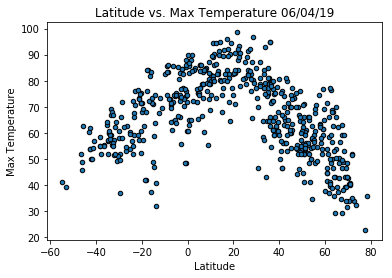

In [10]:
weather_df.plot(kind='scatter',x='Latitude',y='Temp', marker="o", edgecolors="black")
plt.title("Latitude vs. Max Temperature " + str(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("./LAT_TEMP_BG.png")
plt.show()

#### Latitude vs. Humidity Plot

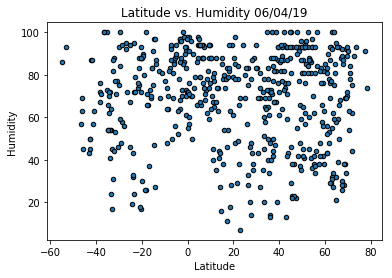

In [11]:
weather_df.plot(kind='scatter',x='Latitude',y='Humidity', marker="o", edgecolors="black")
plt.title("Latitude vs. Humidity " + str(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("./LAT_HUM_BG.png")
plt.show()

#### Latitude vs. Cloudiness Plot

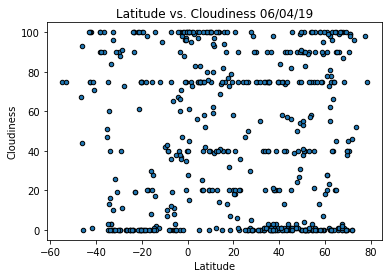

In [12]:
weather_df.plot(kind='scatter',x='Latitude', y='Clouds', marker="o", edgecolors="black")
plt.title("Latitude vs. Cloudiness " + str(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("./LAT_CLOUD_BG.png")
plt.show()

#### Latitude vs. Wind Speed Plot

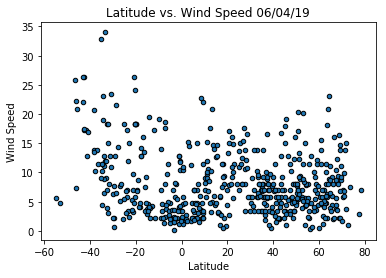

In [13]:
weather_df.plot(kind='scatter',x='Latitude', y='Wind', marker="o", edgecolors="black")
plt.title("Latitude vs. Wind Speed " + str(time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("./LAT_WIND_BG.png")
plt.show()